In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data'

In [8]:
file=f'{bigDir}\cellinfo_200203_v10.csv'

In [9]:
data=pd.read_csv(file)

# data visualizations 

In [10]:
data=data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [11]:
data.head()

,Unnamed: 0.1.1,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,...,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu,day,physical_age,mol_age_mod
0,0,20200203_cell_00.ciz,20200203-06-13-63X 16bit,20200203 simcmxy06,647.518,153.039,MCM3,1.0,HP1beta,2.0,...,593140967.0,411417481.0,280431564.0,130985917.0,531366362.0,69211312.0,462155050.0,d20200203,2.333333,0.225
1,1,20200203_cell_01.ciz,20200203-06-25-63X 16bit,20200203 simcmxy06,1490.165,332.591,MCM3,1.0,HP1beta,2.0,...,473099293.0,284459269.0,137123780.0,147335489.0,380671134.0,54907330.0,325763804.0,d20200203,1.333333,0.166
2,2,20200203_cell_02.ciz,20200203-06-27-63X 16bit,20200203 simcmxy06,1560.535,380.034,MCM3,1.0,HP1beta,2.0,...,438825571.0,257712769.0,142562608.0,115150161.0,359260858.0,35585448.0,323675410.0,d20200203,1.333333,0.166
3,3,20200203_cell_03.ciz,20200203-06-29-63X 16bit,20200203 simcmxy06,930.763,391.252,MCM3,1.0,HP1beta,2.0,...,758335461.0,488267621.0,294355848.0,193911773.0,664738142.0,100314454.0,564423688.0,d20200203,6.833333,0.684
4,4,20200203_cell_04.ciz,20200203-06-51-63X 16bit,20200203 simcmxy06,1653.035,635.701,MCM3,1.0,HP1beta,2.0,...,630264462.0,434549898.0,243834433.0,190715465.0,533609229.0,94060232.0,439548997.0,d20200203,4.166667,0.376


In [12]:
Luc=data.loc[(data.group=='siLuc'),:].copy()

In [13]:
MCM3=data.loc[(data.group=='siMCM3'),:].copy()

In [14]:
xdata=MCM3.loc[(['G1' in x for x in MCM3.category]), 'mol_age_mod']

In [15]:
len(xdata)

69

In [16]:
ydata=MCM3.loc[(['G1' in x for x in MCM3.category]), 'nuc_mcm_total']

In [17]:
len(ydata)

69

## non-linear regression fit

<IPython.core.display.Javascript object>


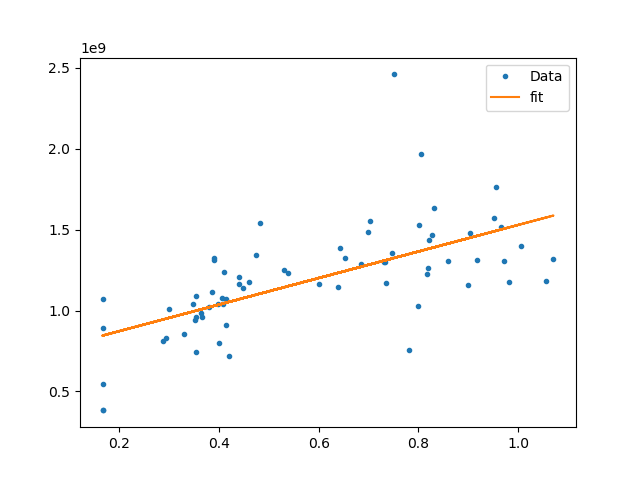

[ 2.32676357e+12 -3.52067143e-04 -2.32605416e+12]


In [18]:
%matplotlib notebook
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

# Plot the actual data
plt.plot(xdata, ydata, ".", label="Data");

# The actual curve fitting happens here
optimizedParameters, pcov = curve_fit(func, xdata, ydata,maxfev=1500);
print(optimizedParameters)

# Use the optimized parameters to plot the best fit
plt.plot(xdata, func(xdata, *optimizedParameters), label="fit");

# Show the graph
plt.legend();
plt.show();

In [108]:
import statsmodels.formula.api as smf
x=xdata
y=ydata
print(len(x))
print(len(y))
weights = np.polyfit(xdata, ydata, 2)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)', data=MCM3.loc[(['G1' in x for x in MCM3.category]), :]).fit()


69
69


In [109]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     68.18
Date:                Sat, 30 May 2020   Prob (F-statistic):           8.27e-12
Time:                        14:51:07   Log-Likelihood:                -1426.6
No. Observations:                  69   AIC:                             2857.
Df Residuals:                      67   BIC:                             2862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.371e-06   1.47e+08  -9.35e-15      1.000   -2.93e+08    2.93e+08
model(x)       1.0000      0.121      8.257      0.000       0.758       1.242
==============================================================================
Omnibus:                       31.941   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.006
Skew:                           1.290   Prob(JB):                     2.14e-24
Kurtosis:                       8.591   Cond. No.                     6.30e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


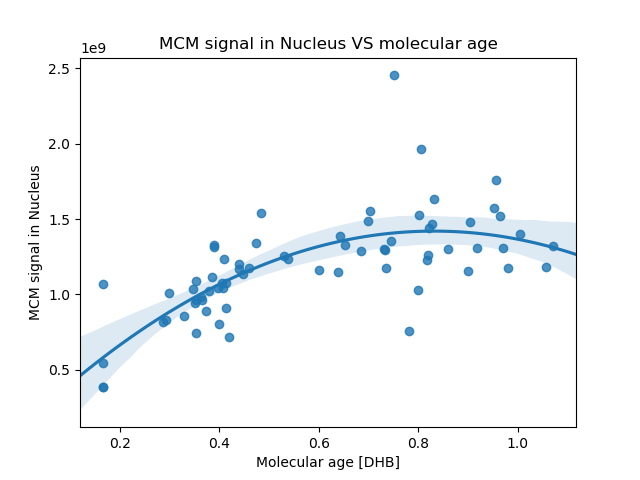

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [110]:
%matplotlib notebook

sn.regplot(x='mol_age_mod',y='nuc_mcm_total',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

<IPython.core.display.Javascript object>


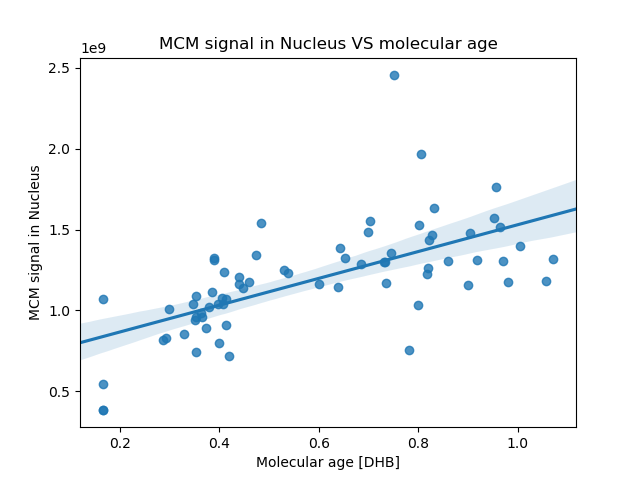

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [111]:
%matplotlib notebook

sn.regplot(x='mol_age_mod',y='nuc_mcm_total',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=1)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

In [112]:
x = np.array(MCM3.mol_age_mod)
y = np.array(MCM3.nuc_mcm_total)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [113]:
slope, intercept, r_value, p_value, std_err

(846914915.0710843,
 692434259.7942424,
 0.6589974390147947,
 3.108380639691515e-10,
 115533708.14335215)

# MCM in heterochromatin / DAPI in nucleus pixels - exploring different regressions for MCM3 group

<IPython.core.display.Javascript object>


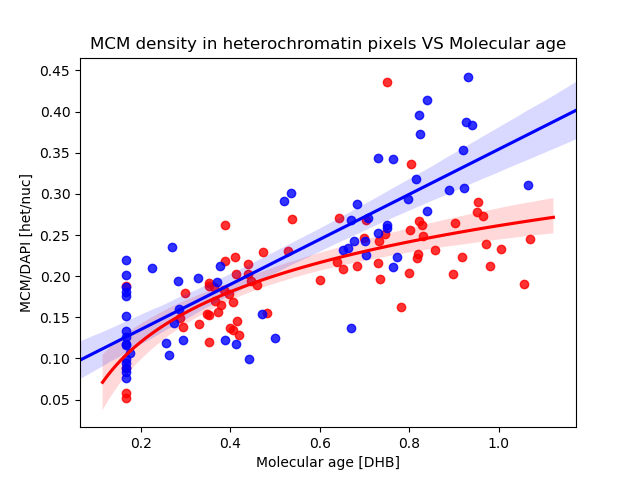

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [35]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_total
sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], color='red', label='MCM3',logx=True)

Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_DAPI_total
sn.regplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:], color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

#### statistical analysis for MCM3 group (log molecular age)

In [38]:
results = smf.ols('temp ~np.log(mol_age_mod)', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:]).fit()

In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     64.84
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.94e-11
Time:                        14:47:47   Log-Likelihood:                 119.69
No. Observations:                  69   AIC:                            -235.4
Df Residuals:                      67   BIC:                            -230.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2614    

<IPython.core.display.Javascript object>


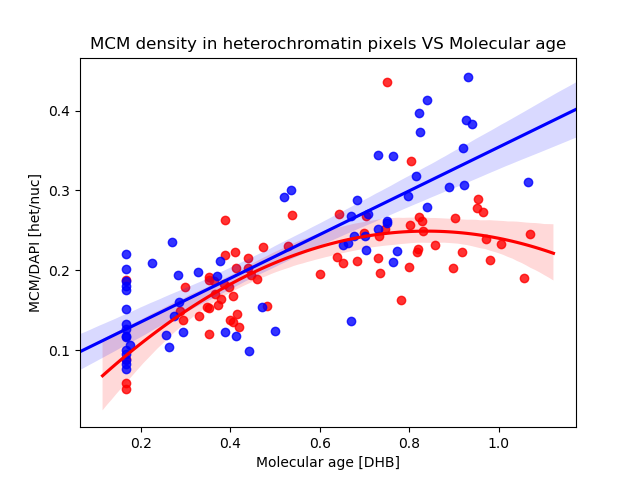

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [36]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_total
sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], color='red', label='MCM3', order=2)

Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_DAPI_total
sn.regplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:], color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

#### statistical analysis for MCM3 group (2nd order polynomial regression)

In [40]:
results = smf.ols('temp ~np.square(mol_age_mod)', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:]).fit()

In [41]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     35.06
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.22e-07
Time:                        14:48:31   Log-Likelihood:                 110.86
No. Observations:                  69   AIC:                            -217.7
Df Residuals:                      67   BIC:                            -213.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

<IPython.core.display.Javascript object>


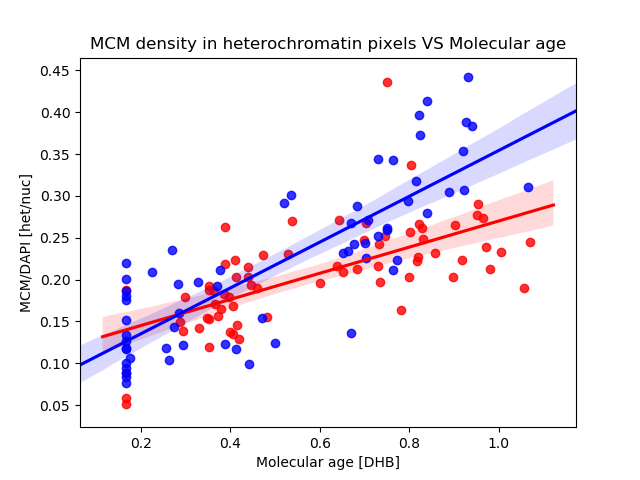

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [42]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_total
sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], color='red', label='MCM3')

Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_DAPI_total
sn.regplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:], color='blue',label='Luc')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

In [43]:
results = smf.ols('temp ~ (mol_age_mod)', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:]).fit()

In [44]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     49.62
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           1.26e-09
Time:                        14:56:52   Log-Likelihood:                 115.46
No. Observations:                  69   AIC:                            -226.9
Df Residuals:                      67   BIC:                            -222.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1139      0.014      8.053      